# Grabcut Algorithm: OpenCV

GrabCut is an interactive image segmentation algorithm used in computer vision and image processing to separate an object or region of interest from the background in an image. It is a semi-automatic technique that combines both user interaction and automated computation to achieve high-quality image segmentation. The GrabCut algorithm was introduced by Carsten Rother, Vladimir Kolmogorov, and Andrew Blake in 2004.

Here's how the GrabCut algorithm works:

1. **Initialization**:
   - The user provides an initial bounding box or rectangle around the object of interest in the image. This bounding box roughly defines the region to be segmented.

2. **Foreground and Background Labels**:
   - Initially, all pixels inside the bounding box are labeled as "foreground," and all pixels outside the bounding box are labeled as "background."

3. **Iterative Optimization**:
   - GrabCut iteratively refines the segmentation by alternately optimizing the labeling of pixels and estimating the Gaussian mixture models of the foreground and background.

4. **Graph Cut Optimization**:
   - GrabCut formulates the problem as an energy minimization task and uses the Graph Cut algorithm to find the optimal labeling of pixels. The energy function incorporates both color information and spatial smoothness priors.

5. **User Interaction**:
   - During the iterative process, the user has the option to correct any misclassified pixels by "painting" or marking them as either foreground or background. This user interaction helps refine the segmentation result.

6. **Convergence**:
   - The iterative optimization continues until convergence, meaning that the segmentation result stabilizes or reaches a predefined stopping criterion.

7. **Final Segmentation**:
   - The final segmentation mask is obtained, separating the object of interest from the background.

GrabCut is known for its effectiveness in segmenting objects with complex shapes and textures. It is particularly useful when traditional thresholding or color-based segmentation methods are not sufficient due to variations in illumination, object appearance, or cluttered backgrounds.

Applications of the GrabCut algorithm include object recognition, image editing, and various computer vision tasks where accurate object segmentation is required. While GrabCut can provide high-quality results, it does require some user interaction, which may not be suitable for fully automated scenarios.

Implementing the GrabCut algorithm using OpenCV in Python allows you to perform interactive image segmentation. Here's a basic example of how to use OpenCV's `cv2.grabCut()` function:

```python
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image from file
image = cv2.imread('image.jpg')

# Create a mask and initialize it with zeros
mask = np.zeros(image.shape[:2], np.uint8)

# Create two arrays for the background and foreground models
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# Define a rectangle around the object of interest (user input or programmatic)
rect = (50, 50, 400, 300)  # Format: (x, y, width, height)

# Apply GrabCut algorithm to segment the object
cv2.grabCut(image, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

# Create a mask where the foreground and likely foreground pixels are set to 1
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

# Multiply the original image by the mask to extract the foreground
result = image * mask2[:, :, np.newaxis]

# Display the original image and the segmented result
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(122), plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB)), plt.title('Segmented Result')
plt.show()
```

In this code:

1. Load an image from a file (replace `'image.jpg'` with the path to your image).

2. Initialize a binary mask with zeros, where we will specify the regions of the image as foreground or background.

3. Create arrays `bgdModel` and `fgdModel` to store background and foreground information.

4. Define a rectangle (`rect`) around the object of interest. This can be specified manually by the user or programmatically.

5. Apply the GrabCut algorithm using `cv2.grabCut()`. This function updates the mask to distinguish between background, foreground, and probable regions.

6. Create a new binary mask (`mask2`) where the foreground and likely foreground pixels are set to 1.

7. Multiply the original image by `mask2` to extract the segmented object.

8. Display the original image and the segmented result using `matplotlib`.

Remember to adjust the `rect` and potentially the parameters of `cv2.grabCut()` based on your specific image and segmentation needs. Additionally, you can add user interaction to refine the segmentation by allowing users to paint or edit the mask.

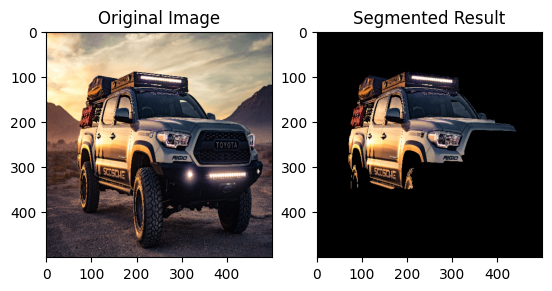

: 

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image from file
image = cv2.imread('Images/pexels-kelson-downes-1149137.jpg')
image=cv2.resize(image,(500,500))

# Create a mask and initialize it with zeros
mask = np.zeros(image.shape[:2], np.uint8)

# Create two arrays for the background and foreground models
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# Define a rectangle around the object of interest (user input or programmatic)
rect = (50, 50, 400, 300)  # Format: (x, y, width, height)

# Apply GrabCut algorithm to segment the object
cv2.grabCut(image, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

# Create a mask where the foreground and likely foreground pixels are set to 1
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

# Multiply the original image by the mask to extract the foreground
result = image * mask2[:, :, np.newaxis]

cv2.imshow('image',image)
# Display the original image and the segmented result
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(122), plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB)), plt.title('Segmented Result')
plt.show()


In [6]:
#image = cv2.imread('Images/pexels-kelson-downes-1149137.jpg')
cv2.resize(image,(500,500))
cv2.imshow('Original Image', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [1]:
#GrabCut Algoritm with the help of this algoritm we easily
#cutoff any foreground object from image or video.
#It works like a rectangle portion mark on the image
#and area outise the rectangle is treat as a extra part
#so this algo remove it completely.
#Gaussian mixtuere model help to achieve the target



import	numpy  as  np
import	cv2

img  =	cv2.imread('Images/car.jpg')
img = cv2.resize(img,(800,800))
mask =	np.zeros(img.shape[:2],np.uint8)
 
 
bgdModel =  np.zeros((1,65),np.float64)*255
fgdModel =  np.zeros((1,65),np.float64)*255
 
#parameter(img,mask,rect,bgmodel,fgmodel,iter,method) 
rect =	(134,150,660,730)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,
            cv2.GC_INIT_WITH_RECT)
 
 
mask2  =  np.where((mask==2)|(mask==0),0,1).astype('uint8')
img  =	img*mask2[:,:,np.newaxis]
 
cv2.imshow("res==",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

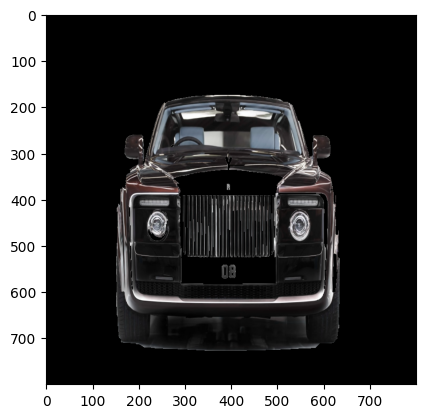

In [2]:
import matplotlib.pyplot as plt
plt.imshow(img)